## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# 3. Data Preparation/ Cleaning

# Steps to Be Performed:

### Cleaning the Data:

1. Handle Missing Values: Identify and address missing data through imputation, estimation, or removal to maintain dataset integrity.

2. Remove Duplicate Entries: Eliminate redundant rows to ensure each data point is unique and reliable.
3. Ensure Consistent Formats: Convert data into uniform formats for seamless analysis (e.g., standardizing date or numeric representations).

### Integrating and Structuring the Data:

1. Standardize Text: Clean and harmonize textual data by converting to lowercase, trimming whitespace, removing special characters, and resolving inconsistencies.

2. Standardize Columns: Refine column structure by renaming for clarity, aligning data types for consistency, and reordering to enhance usability.

3. Select Key Features: Focus on the most relevant columns to streamline analysis and improve model performance.

4. Feature Engineering: Create new variables or transform existing ones to extract deeper insights and enrich the dataset.


### Merging datasets

1. tn and bom using title, left merge
2. imdb and tmdb using original_title, inner merge
3. rt and rt_review using id, inner merge
4. inspect unmatched rows after merging

In [29]:
# Importing the required Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Connecting to the database
conn = sqlite3.connect('zippedData/im.db')

## Dataset 1: Box Office Mojo (bom)

In [30]:
# Reading and loading the dataset
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [31]:
# check the colunms
bom.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [32]:
#checking the datatypes of the columns 
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [33]:
# Dropping 'studio' column
bom.drop(columns=['studio'], inplace=True)

In [34]:
bom.columns

Index(['title', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [35]:
#concise summary statistics
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [36]:
#checking the dataset shape
bom.shape

(3387, 4)

In [37]:
#checking the dataset information
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [38]:
# Checking for Null values
bom.isna().sum()

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [39]:
# Checking if there is duplicates
bom.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [40]:
# Fill missing 'domestic_gross' with the mean of the column
bom['domestic_gross'] = bom['domestic_gross'].fillna(bom['domestic_gross'].mean())


In [41]:
import pandas as pd

# Clean the 'foreign_gross' column: Remove any non-numeric characters like '$' and ','
bom['foreign_gross'] = bom['foreign_gross'].replace({'\$': '', ',': ''}, regex=True)

# Convert the column to numeric, forcing errors to NaN (invalid entries will become NaN)
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')


# Check the data type to confirm conversion
print(bom['foreign_gross'].dtype)


# Check for any remaining missing values
print(bom['foreign_gross'].isna().sum())


float64
1350


In [42]:
bom.isna().sum()

title                0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

## Dataset 2: The Numbers (tn)

In [43]:
# Reading and loading the dataset
tn = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [44]:
# check the colunms
tn.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [45]:
# Reordering or aligning columns between datasets:
tn = tn[['id', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'release_date']]
tn.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_date
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279","Dec 18, 2009"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","May 20, 2011"
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Jun 7, 2019"
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","May 1, 2015"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","Dec 15, 2017"


In [46]:
# Dropping 'id' column
tn.drop(columns=['id'], inplace=True)

In [47]:
#checking the datatypes of the columns 
tn.dtypes

movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
release_date         object
dtype: object

In [48]:
#checking the dataset shape
tn.shape

(5782, 5)

In [49]:
#checking the dataset information
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   movie              5782 non-null   object
 1   production_budget  5782 non-null   object
 2   domestic_gross     5782 non-null   object
 3   worldwide_gross    5782 non-null   object
 4   release_date       5782 non-null   object
dtypes: object(5)
memory usage: 226.0+ KB


In [50]:
# Checking for Null values
tn.isnull().sum()

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_date         0
dtype: int64

In [51]:
# Renaming the column movie to title to allow merging
tn = tn.rename(columns={'movie': 'title'})

In [52]:
tn.head()

,title,production_budget,domestic_gross,worldwide_gross,release_date
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279","Dec 18, 2009"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875","May 20, 2011"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Jun 7, 2019"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963","May 1, 2015"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747","Dec 15, 2017"


In [53]:
# Remove dollar signs and commas, then convert to numeric for relevant columns
tn['production_budget'] = tn['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)
tn['domestic_gross'] = tn['domestic_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
tn['worldwide_gross'] = tn['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check the data types to ensure proper conversion
print(tn[['production_budget', 'domestic_gross', 'worldwide_gross']].dtypes)

production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


### Calculating profitability

In [54]:
# Calculating profit and profitability ratio using worldwide gross
tn['profit'] = tn['worldwide_gross'] - tn['production_budget']
tn['profitability_ratio'] = tn['worldwide_gross'] / tn['production_budget']



### Correlation between budget and the World-wide gross(Revenue)

In [55]:
# Calculate correlation between budget and worldwide gross
correlation = tn[['production_budget', 'worldwide_gross']].corr()
print(correlation)

                   production_budget  worldwide_gross
production_budget           1.000000         0.748306
worldwide_gross             0.748306         1.000000


correlation between production budget and worldwide gross is 0.7483 which indicates a strong positive relationship between the two variables.In general, movies with higher production budgets may tend to have higher worldwide gross earnings this means that production budget is an importantfactor in determining box office revenue ,although there are still variations to this

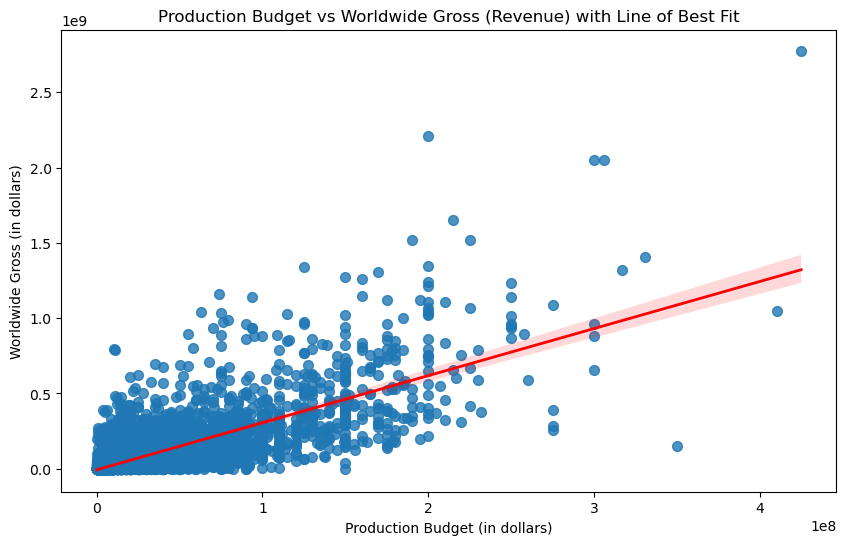

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with a line of best fit to visualize Budget vs Worldwide Gross
plt.figure(figsize=(10, 6))
sns.regplot(x='production_budget', y='worldwide_gross', data=tn, scatter_kws={'s': 50}, line_kws={'color': 'red', 'lw': 2})

# Add labels and title
plt.title('Production Budget vs Worldwide Gross (Revenue) with Line of Best Fit')
plt.xlabel('Production Budget (in dollars)')
plt.ylabel('Worldwide Gross (in dollars)')
plt.show()



There is a positive correlation of  0.748306 between production budget and World-wide gross (Revenue)

In [57]:
# Sort by profitability ratio
high_profitability = tn.sort_values(by='profitability_ratio', ascending=False).head(10)
print(high_profitability[['production_budget', 'worldwide_gross', 'profitability_ratio']])


      production_budget  worldwide_gross  profitability_ratio
5745            25000.0       45000000.0          1800.000000
5613           200000.0       99750000.0           498.750000
5492           450000.0      194183034.0           431.517853
5679           100000.0       41656474.0           416.564740
5406           600000.0      248300000.0           413.833333
5709            65000.0       22233808.0           342.058585
5346           858000.0      268000000.0           312.354312
5773             7000.0        2041928.0           291.704000
5676           114000.0       30087064.0           263.921614
5210          1000000.0      225000000.0           225.000000


Lower budget films can sometimes out perform high budget films when it comes to profitability.this can be seen from the first film which has a budget of 25000 and has the highest profitability ratio.

As budget increases ,there is also a tendency of having diminishing returns in the sense that despite increasing the production budget and having large revenues ,this profitability ratio may be small compared to smaller-budget films.

This clearly shows that a higher production budget is not necessarily an indicator of higher profitability and there are other factors involved in achieving profitability

In [58]:
# Define budget ranges
bins = [0, 1e6, 1e7, 5e7, 1e8, 5e8, 1e9]
labels = ['$0-1M', '$1M-10M', '$10M-50M', '$50M-100M', '$100M-500M', '$500M+']
tn['budget_range'] = pd.cut(tn['production_budget'], bins=bins, labels=labels)

# Calculate the average revenue-to-budget ratio for each budget range
tn['revenue_to_budget'] = tn['worldwide_gross'] / tn['production_budget']
revenue_by_budget_range = tn.groupby('budget_range')['revenue_to_budget'].mean()
print(revenue_by_budget_range)


budget_range
$0-1M         18.637841
$1M-10M        4.203034
$10M-50M       2.865094
$50M-100M      2.594578
$100M-500M     3.194925
$500M+              NaN
Name: revenue_to_budget, dtype: float64


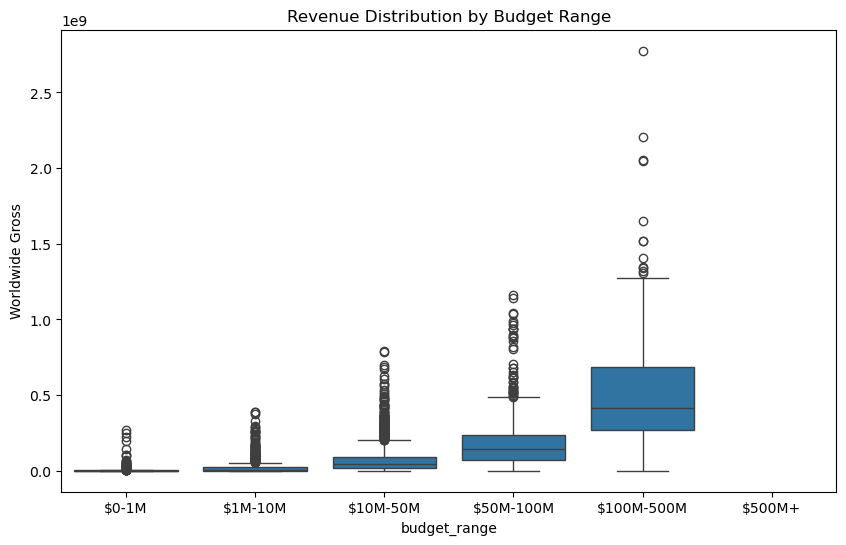

In [59]:
# Box plot to visualize the distribution of worldwide gross across budget ranges
plt.figure(figsize=(10, 6))
sns.boxplot(x='budget_range', y='worldwide_gross', data=tn)
plt.title('Revenue Distribution by Budget Range')
plt.xlabel('budget_range')
plt.ylabel('Worldwide Gross')
plt.show()


 As the production budget increases, the revenue-to-budget ratio decreases. Larger-budget films, especially those in the $10M-100M range, are less efficient in turning budget into revenue.
 
Moderate budgets films offer good return on Investment From the ranges in the $1M-10M and $10M-50M they have strong returns, although these returns become more variable as the budget grows.   

### Recommendation

Focus on Moderate-Budget Films : I recommend that the company Invests in films with moderate budgets, as they offer a higher return on investment compared to expensive productions. Low-budget films have shown strong profitability ratios.

Prioritize Audience Appeal: Before spending large amounts on a film, I recommend that the company considers its potential audience appeal to avoid overspending. A broader audience can lead to greater success.

Track and Adjust Strategies: I  recommend that the company Continuously monitor trends in film budgets and profits to refine the company’s approach. This helps ensure the company stays competitive and makes informed decisions.



## Dataset 3: Rotten Tomatoes Movies Info (rt_movie_info) Reviews (rt_reviews)

In [63]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [64]:
# check the colunms
rt_movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [65]:
#checking the datatypes of the columns 
rt_movie_info.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [31]:
#checking the dataset shape
rt_movie_info.shape

(1560, 12)

In [32]:
#checking the dataset information
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [33]:
# Checking for Null values
rt_movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

## Dataset 4: Rotten Tomatoes Reviews (rt_reviews)

In [34]:
# rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t')

In [35]:
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding='windows-1252')
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


## Dataset 5: IMDB Database

# im.db.zip (SQLite Database)

Description: Contains movie-related data from IMDB.

Relevant Tables:

movie_basics: Includes details like title, genres, runtime, and start year.

movie_ratings: Contains average ratings and vote counts for movies.

In [34]:
# Execute SQL query using pandas read_sql() and pass the connection
import sqlite3
import pandas as pd
conn = sqlite3.connect("zippedData/im.db")

In [35]:
imdb = pd.read_sql("""select * from movie_basics;""",conn)
imdb

DatabaseError: Execution failed on sql 'select * from movie_basics;': no such table: movie_basics

In [ ]:
imdb.duplicated

In [36]:
imdb = pd.read_sql("""select * from movie_basics;""",conn)
imdb

DatabaseError: Execution failed on sql 'select * from movie_basics;': no such table: movie_basics

## Dataset 6: TMDB Database

In [32]:
conn = sqlite3.connect("zippedData/tmdb.movies.csv.gz")

In [37]:
tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
